In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp,pi,log
import sympy
# 指定x為符號
x = sympy.Symbol('x')
e=exp(1)

In [2]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

%pylab inline

pylab.rcParams['figure.figsize'] = (10, 6) #設置繪圖尺寸

Populating the interactive namespace from numpy and matplotlib


C:\Users\test\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#1.1
def app1(n):#公式(1)
    return (2*pi)**0.5*n**(n+0.5)*e**(-n)
def app2(n):#公式(2)
    return ((2*n+1/3)*pi)**0.5*n**n*e**(-n)
def r(n): #r=真實值real
    return np.math.factorial(n)
#公式(1)log[RelativeError]的list，範圍從1到90
app1l=list(log(abs((app1(i)-r(i))/r(i))) for i in range(1,91))
#公式(2)log[RelativeError]的list，範圍從1到90
app2l=list(log(abs((app2(i)-r(i))/r(i))) for i in range(1,91))

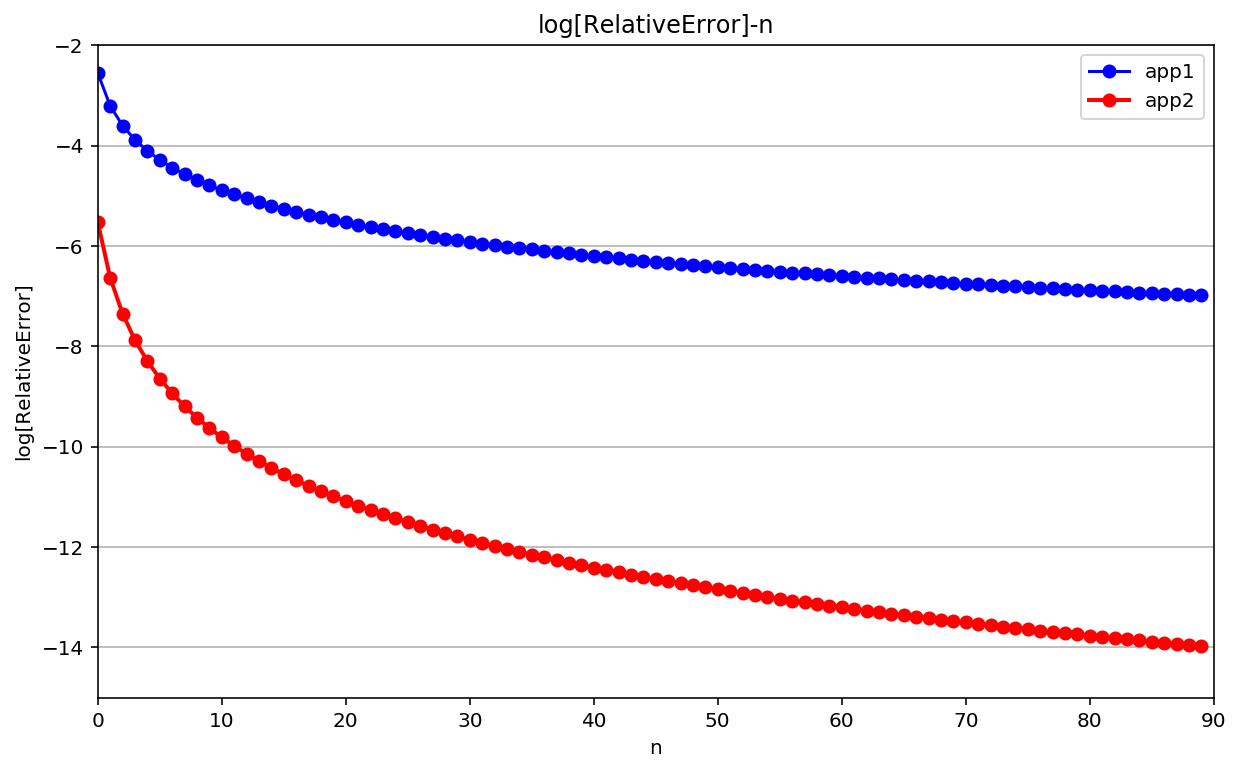

In [4]:
#1.2
plt.title('log[RelativeError]-n')
plt.xlabel('n')
plt.ylabel('log[RelativeError]')
plt.axis([0,90,-15,-2])
plt.grid(b=True,axis='y')
###
plt.plot(app1l,color='blue',marker='o',label='app1')

plt.plot(app2l,color='red',
         linewidth=2,marker='o',label='app2')
###
plt.legend(loc='upper right')
#1.3 公式(2)的誤差較小，n越大，誤差越小

In [5]:
#1.4,1.5

def gf(x):#gf=gamma function求20階乘前，要被積分的函式
    return x**20*e**(-x)
    
def Tn(n,b):#梯形法，從0積到b，切成n等分
    f=gf
    # 以n建立各個取點的list，num=n+1的原因為有n+1個點    
    lista=list(np.linspace(0,b,num=n+1))
    #設定初始值a=0，之後進行運算用
    a=0
    #先算中間的值，先去掉f(x_0)即f(x_n)的計算
    for i in range(1,len(lista)-1):
        a+=2*b*f(lista[i])/2/n
    #接著進行左右端點的計算，把值加入a中
    a+=f(0)*b/2/n+f(b)*b/2/n
    # return 的目的是把 nontype 變成 float
    return a
def Sr(n,b):# 辛普森法，切成n等分，從0積到b
    f=gf
    if n%2==0:#n是偶數
        # 以n建立各個取點的list，num=n+1的原因為有n+1個點    
        lista=list(np.linspace(0,b,num=n+1))
        #設定初始值a=0，之後進行運算用
        a=0
        #先算中間的值，先去掉f(x_0)即f(x_n)的計算
        c=(b-0)/3/n
        for i in range(1,len(lista)-1):
            if i%2==1: #計算x1,x3,x5,......,xn-1的部分
                a+=f(lista[i])*c*4
            else:#計算x2,x4,x6,......,xn-2的部分
                a+=f(lista[i])*c*2
        #接著進行左右端點的計算，把值加入a中
        a+=(f(0)+f(b))*c
        # return 的目的是把 nontype 變成 float
        return a
    return None #n為奇數的話不須回應
def found(f):#找到b、n、步數的函式
    c=[]
    for i in range(1,101):#因為b不會超過100，所以設定i從1跑到100
        for j in range(1,201): #設定n 
            a=f(j,i) 
            if a==r(20):
                c.append([j,i])
    b=200*(c[0][1]-1)+c[0][0]#跑的步數
    if f==Tn:
        print('跑了',b,'步')
    q=100*(c[0][1]-1)+int(c[0][0]/2)+c[0][0]%2
    if f==Sr:
        print('跑了',q,'步')
    print('n=',c[0][0],'b=',c[0][1])
        
found(Tn)
found(Sr)


跑了 15870 步
n= 70 b= 80
跑了 7864 步
n= 128 b= 79


In [6]:
path=('SA_CS01_8mN_F280_E66_000-LC_DYN_new.csv')
df = pd.read_csv(path)
df.columns

Index(['Test Time (s)', 'Indent Disp. (nm)', 'Indent Act. Load (µN)',
       'Indent Load (µN)', 'Indent Disp. Volt. (V)',
       'Indent Act. Load Volt. (V)', 'Indent Act. Output Volt. (V)',
       'Dynamic Freq. (Hz)', 'Disp. Amp. (nm)', 'Phase Shift (deg)',
       'Load Amp. (µN)', 'Dynamic Comp. (nm/µN)', 'Disp. Amp. Volt. (V)',
       'Load Amp. Volt. (V)', 'Storage Mod. (GPa)', 'Loss Mod. (GPa)',
       'Hardness (GPa)', 'Complex Mod. (GPa)', 'Tan-Delta',
       'Storage Stiff. (µN/nm)', 'Loss Stiff. (µN/nm)',
       'Complex Stiff. (µN/nm)', 'Damping (g/s)', 'Contact Area (nm^2)',
       'Contact Depth (nm)', 'Ref. Stor. Mod. (GPa)', 'Ref. Loss Mod. (GPa)',
       'Ref. Hardness (GPa)', 'Ref. Compl. Mod. (GPa)',
       'Ref. Indent Disp. (nm)', 'Ref. Contact Area (nm^2)',
       'Ref. Cont. Depth. (nm)'],
      dtype='object')

In [7]:
A=df['Contact Area (nm^2)']
P=df['Indent Load (µN)']
c0=24.5
h=df['Contact Depth (nm)']
H=df['Hardness (GPa)']

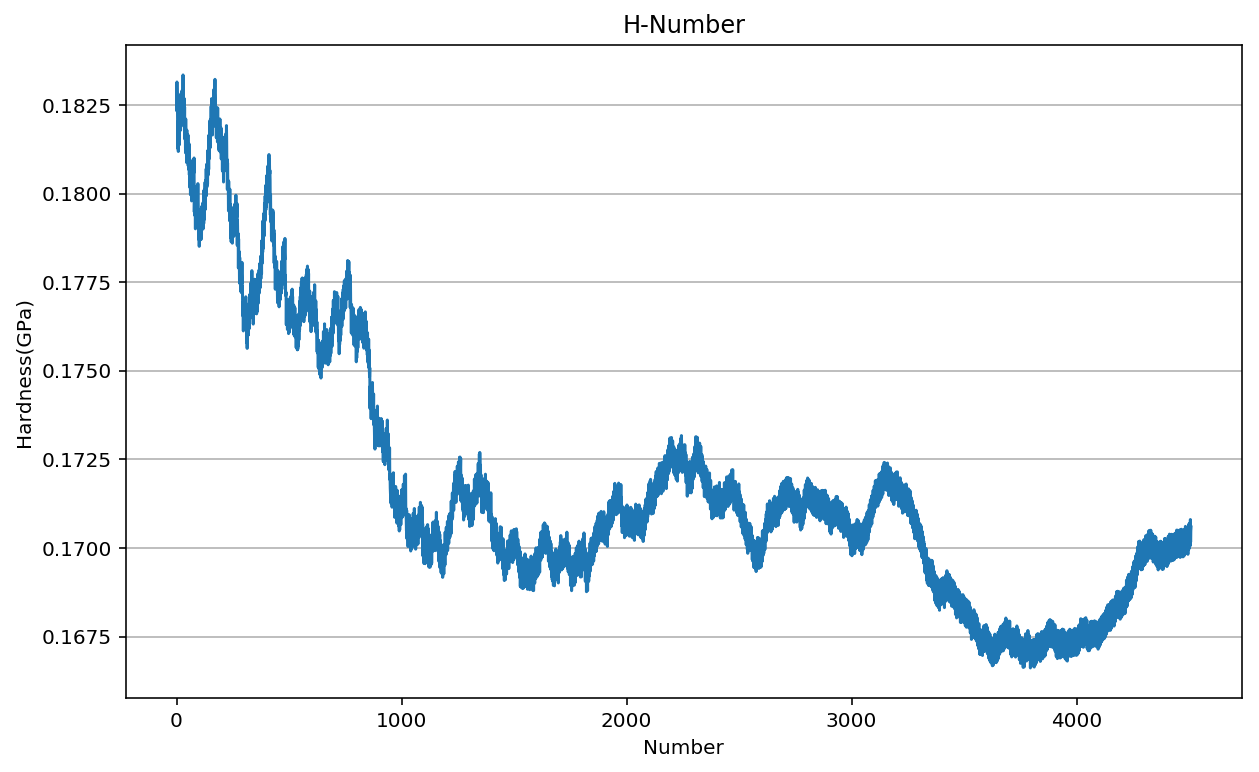

In [8]:
plt.title('H-Number')
plt.xlabel('Number')
plt.ylabel('Hardness(GPa)')
plt.grid(b=True,axis='y')
###
plt.plot(H)

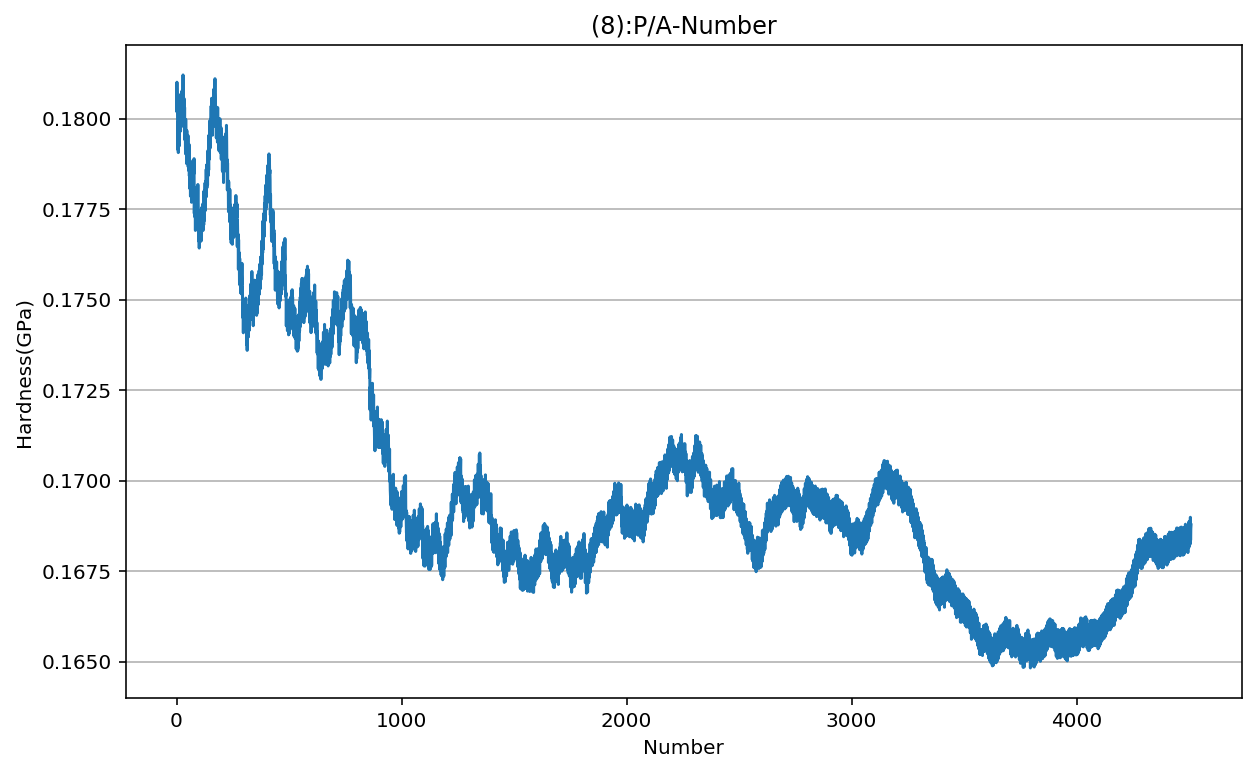

In [9]:
plt.title('(8):P/A-Number')
plt.xlabel('Number')
plt.ylabel('Hardness(GPa)')
plt.grid(b=True,axis='y')
plt.plot(P/A*1000)

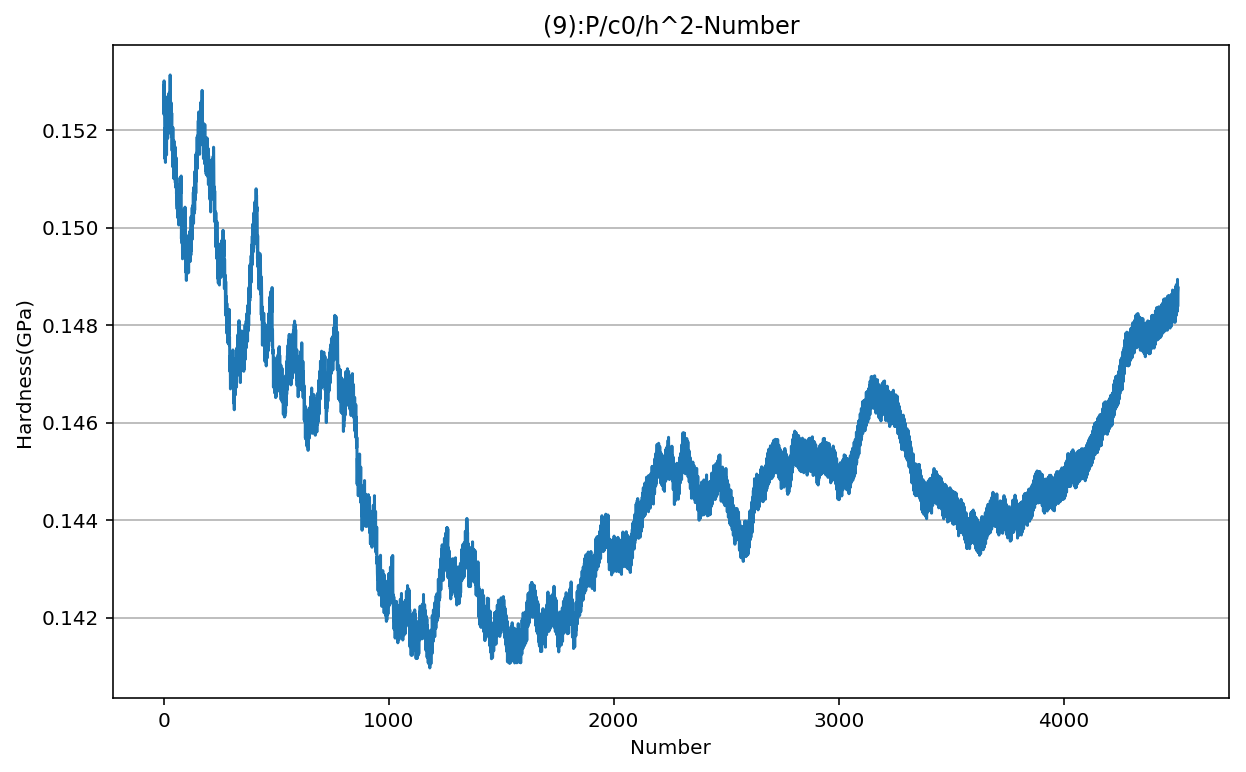

In [10]:
plt.title('(9):P/c0/h^2-Number')
plt.xlabel('Number')
plt.ylabel('Hardness(GPa)')
plt.grid(b=True,axis='y')
plt.plot(P/c0/h**2*1000)

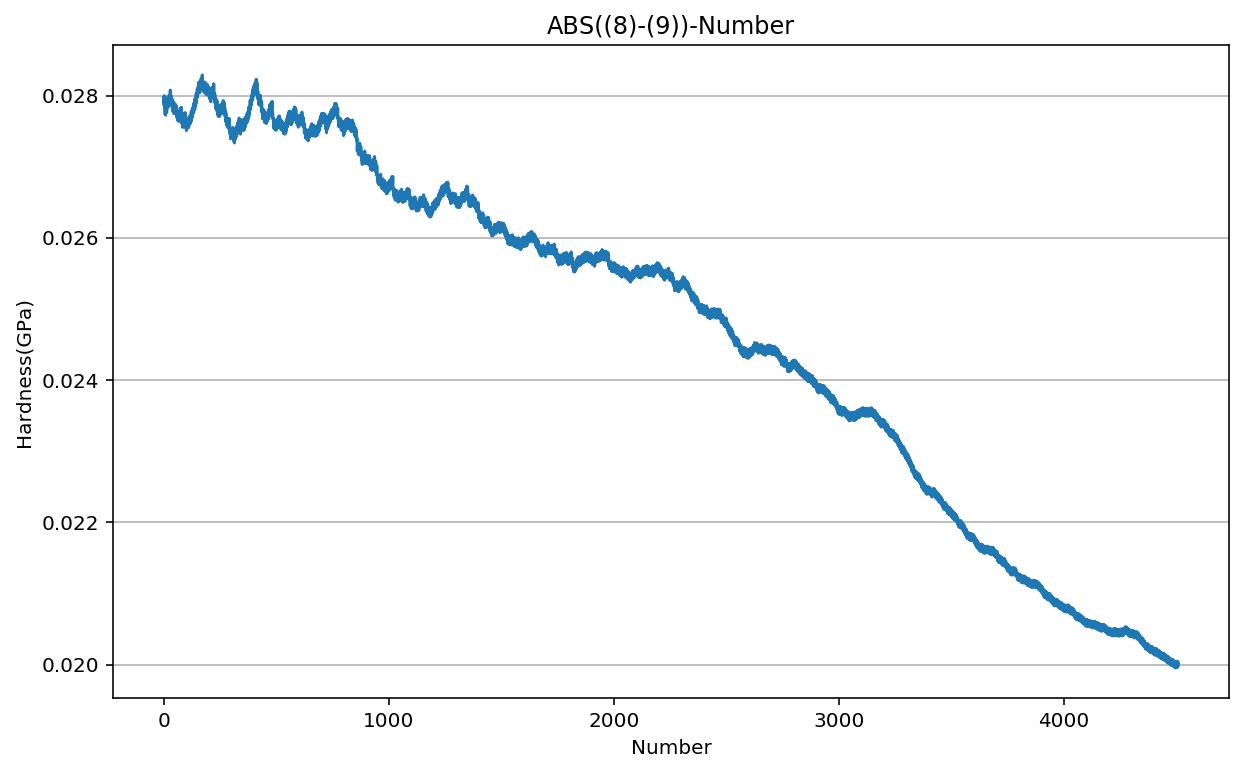

In [11]:
plt.title('ABS((8)-(9))-Number')
plt.xlabel('Number')
plt.ylabel('Hardness(GPa)')
plt.grid(b=True,axis='y')
plt.plot(abs(P/c0/h**2-P/A)*1000)

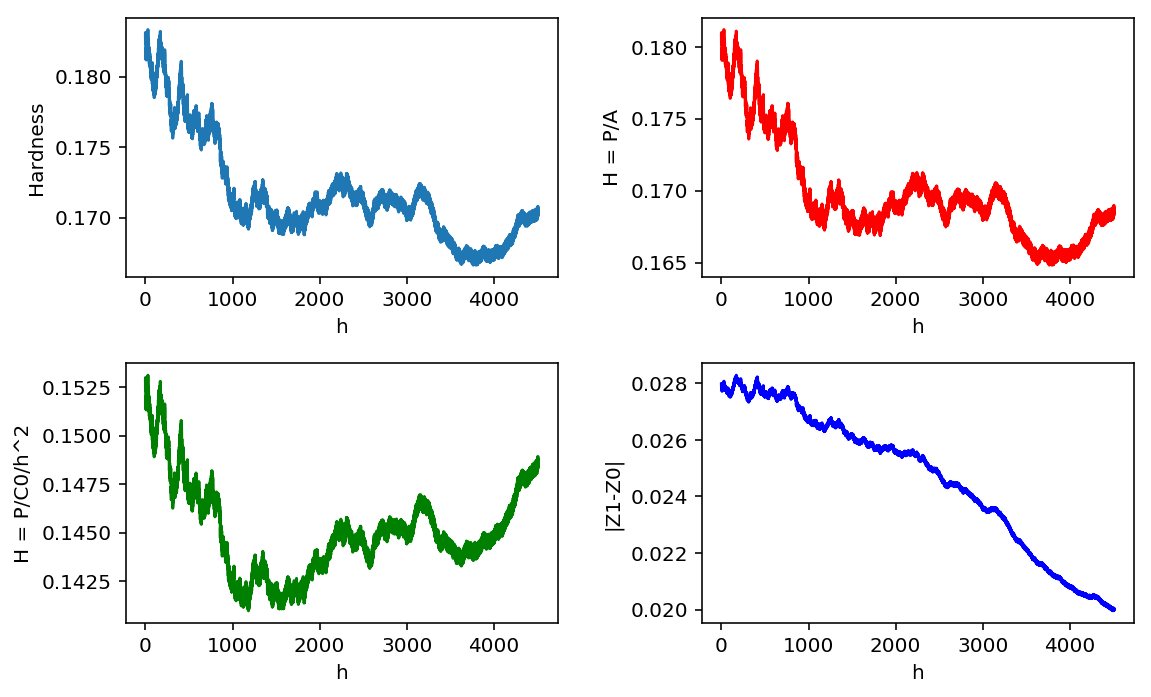

In [12]:
fig = plt.figure()
fig.add_axes([0.1,0.5,0.3,0.3])
plt.xlabel('h')
plt.ylabel('Hardness')
plt.plot(H)

fig.add_axes([0.5,0.5,0.3,0.3])
plt.xlabel('h')
plt.ylabel('H = P/A')
plt.plot(P/A*1000,color='red')

fig.add_axes([0.1,0.1,0.3,0.3])
plt.xlabel('h')
plt.ylabel('H = P/C0/h^2')
plt.plot(P/c0/h**2*1000,color='green')

fig.add_axes([0.5,0.1,0.3,0.3])
plt.xlabel('h')
plt.ylabel('|Z1-Z0|')
plt.plot(abs(P/c0/h**2-P/A)*1000,color='blue')
